In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### EDA & Feature Eng.

In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape 

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(1337, 7)

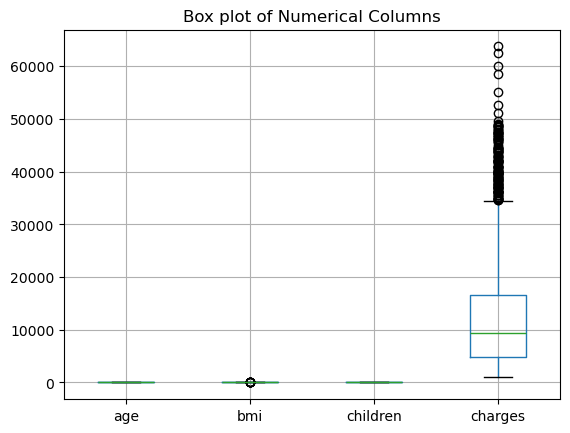

In [14]:
# outlier for numerical features
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show() 

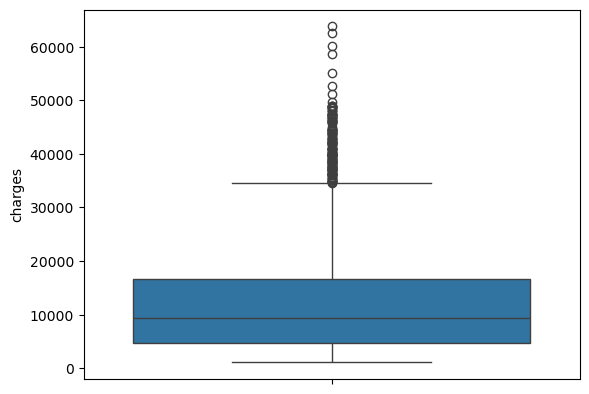

In [15]:
sns.boxplot(y=df['charges'])
plt.show()

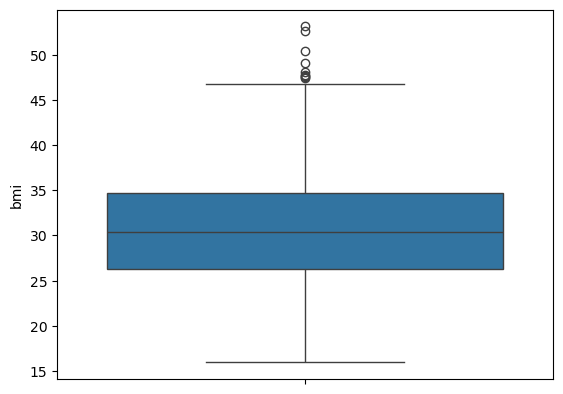

In [16]:
sns.boxplot(y=df['bmi'])
plt.show()

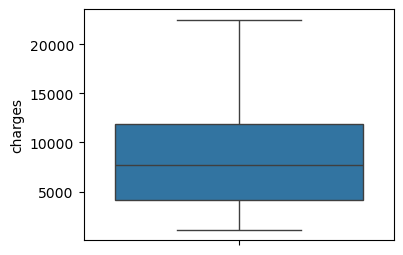

In [17]:
# Remove  outlier values for 'charges'
plt.figure(figsize=(4, 3))
df=df[(df['charges'] < 23000)]
sns.boxplot(y=df['charges'])
plt.show()

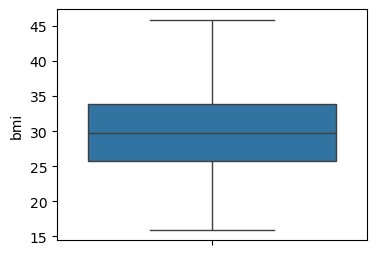

In [18]:
# Remove  outlier values for 'bmi'
plt.figure(figsize=(4, 3))
df=df[(df['bmi'] < 46)]
sns.boxplot(y=df['bmi'])
plt.show()

In [19]:
df.shape 

(1095, 7)

### Encoding & Reshaping

In [21]:
# Label Encoding for 'sex' and "smoker'
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [22]:
# One-Hot Encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [23]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [24]:
df.shape

(1095, 9)

### Dependent & Independent

In [26]:
X = df.drop('charges', axis=1) #Independent
y = df['charges'] #Dependent

In [27]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False


In [28]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### StandardScaler

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression & Fit

In [34]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

###  Prediction

In [36]:
y_pred = reg.predict(X_test_scaled)

### Metrics

In [38]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1382.8617186032084
MSE: 8650559.855664194
RMSE: 2941.1834107488426
R2 Score: 0.6463518919074649


### Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

Mean Absolute Error:  1382.9714480700518
Mean Squared Error:  8648698.623937389
R2 Score:  0.6464279819050938


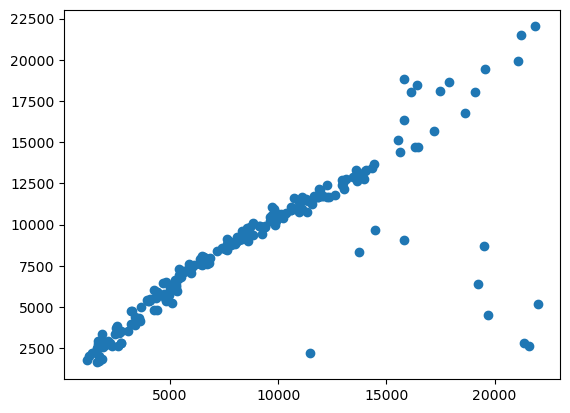

In [41]:
lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("R2 Score: ",score)
plt.scatter(y_test, y_pred)
plt.show()

### Ridge Regression

In [43]:
from sklearn.linear_model import Ridge

Mean Absolute Error:  1384.5117769887113
Mean Squared Error:  8648715.525615124
R2 Score:  0.6464272909386761


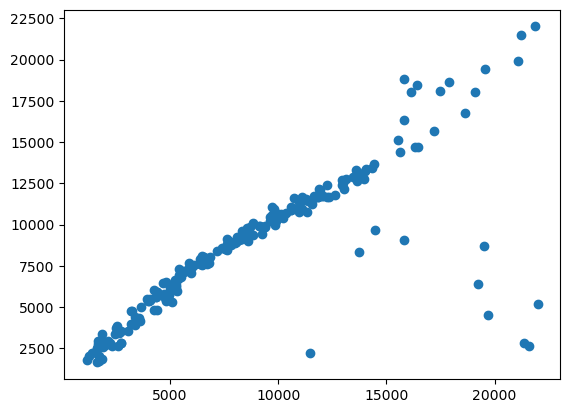

In [44]:
ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("R2 Score: ",score)
plt.scatter(y_test, y_pred)
plt.show()

### Elasticnet Regression

In [46]:
from sklearn.linear_model import ElasticNet

Mean Absolute Error:  2209.04721833416
Mean Squared Error:  10499580.76108951
R2 Score:  0.570761091319102


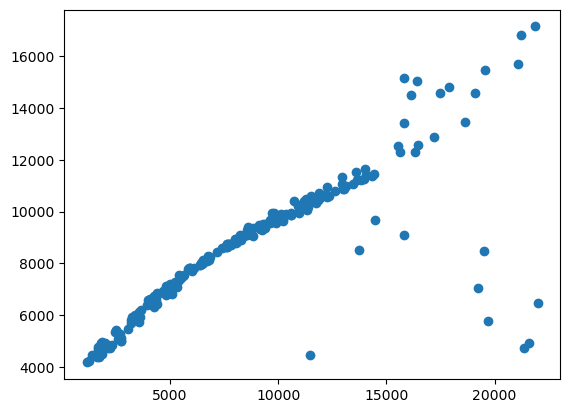

In [47]:
elastic=ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("R2 Score: ",score)
plt.scatter(y_test, y_pred)
plt.show()

### Convert to Polynomial Regression

In [49]:
poly=PolynomialFeatures(degree=1, include_bias=True)  #Because R2 being closer to 1 gives better results

In [50]:
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)

### Poly-> Regression

In [52]:
reg= LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

### Poly -> prediction & R2 Score

In [54]:
y_pred= reg.predict(X_test_poly)
score=r2_score(y_test, y_pred)
print(score)

0.6463518919074643


### Pipeline + Ridge

In [56]:
model_ridge = Pipeline([('poly_features', PolynomialFeatures(degree=2)),('ridge_reg', Ridge())])
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1382.8617186031986
MSE: 8650559.855664207
RMSE: 2941.1834107488444
R2 Score: 0.6463518919074643


### Pipeline + Lasso

In [59]:
model_lasso = Pipeline([('poly_features', PolynomialFeatures(degree=2)),('lasso_reg', Lasso())])
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.605e+08, tolerance: 2.548e+06
  model = cd_fast.enet_coordinate_descent(


In [60]:
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1248.4353359757756
MSE: 8830693.378823992
RMSE: 2971.648259606778
R2 Score: 0.6389877581713352


### Pipeline + Elacticnet

In [62]:
model_elastic = Pipeline([('poly_features', PolynomialFeatures(degree=2)),('elastic_reg', ElasticNet())])
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elastic)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1248.4353359757756
MSE: 8830693.378823992
RMSE: 2971.648259606778
R2 Score: 0.6580087850657594


## 📌 Conclusion

After performing data cleaning and preprocessing, several regression models were applied.  
The best result was obtained using **Polynomial Regression (degree = 2)**.

**Model Performance:**
- **MAE:** 1382.86  
- **MSE:** 8,650,559.86  
- **RMSE:** 2941.18  
- **R² Score:** 0.66

✅ The model explains approximately **66%** of the variance in health insurance charges.